# Exercise3 Object Detection Tutorial
* ChainerCV
* https://chainercv.readthedocs.io/en/stable/tutorial/detection.html

In [0]:
!pip install chainercv
!pip install matplotlib
!pip install 'cupy-cuda100>=6.1.0,<7.0.0'

In [0]:
import chainer
import cupy
import chainercv
import matplotlib

chainer.print_runtime_info()
print('ChainerCV:', chainercv.__version__)
print('matplotlib:', matplotlib.__version__)

Platform: Linux-4.14.79+-x86_64-with-Ubuntu-18.04-bionic
Chainer: 6.1.0
NumPy: 1.16.4
CuPy:
  CuPy Version          : 6.1.0
  CUDA Root             : /usr/local/cuda
  CUDA Build Version    : 10000
  CUDA Driver Version   : 10000
  CUDA Runtime Version  : 10000
  cuDNN Build Version   : 7500
  cuDNN Version         : 7500
  NCCL Build Version    : 2402
  NCCL Runtime Version  : 2402
iDeep: 2.0.0.post3
ChainerCV: 0.13.1
matplotlib: 3.0.3


# Google Drive or Import file


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

#from google.colab import files
#uploaded = files.upload()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd /content/gdrive/My\ Drive/UAE2019/Picture

/content/gdrive/My Drive/UAE2019/Picture


In [0]:
ls

sample1.jpg  sample2.jpg


# Read Image
* Check JPG size

In [0]:
image = 'sample1.jpg'

(3, 375, 500)

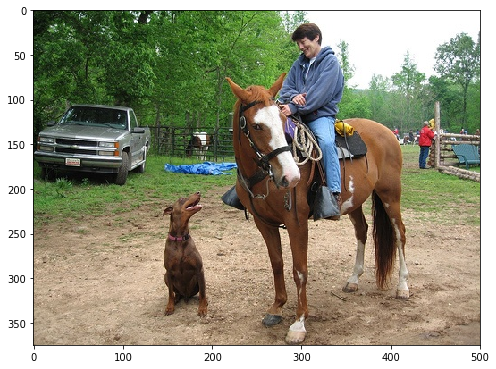

In [0]:
from chainercv.utils import read_image
from chainercv.visualizations import vis_image
import matplotlib.pyplot as plt

img = read_image(image)
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(1, 1, 1)
vis_image(img, ax)

img.shape

# Bounding Boxes
* Bounding boxes in an image are represented as a two-dimensional array of shape $(R,4)$, where $R$ is the number of bounding boxes and the second axis corresponds to the coordinates of bounding boxes. 

* The coordinates are ordered in the array by (y_min, x_min, y_max, x_max)

* Here is an example with a simple toy data.

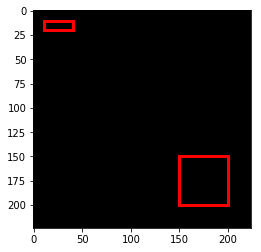

In [0]:
from chainercv.visualizations import vis_bbox
import matplotlib.pyplot as plt
import numpy as np

img = np.zeros((3, 224, 224), dtype=np.float32)
# We call a variable/array of bounding boxes as `bbox` throughout the library
bbox = np.array([[10, 10, 20, 40], [150, 150, 200, 200]], dtype=np.float32)

vis_bbox(img, bbox)
plt.show()

# SSD300 pretrained model

* Weight is trained on VOC 2007 and VOC 2012 datasets
* voc_bbox_label_names: bounding boxes is visualized with label names
* predict()

In [0]:
from chainercv.datasets import voc_bbox_label_names
from chainercv.links import SSD300

/usr/local/lib/python3.6/dist-packages/chainercv/utils/link.py:72: RuntimeWarning: Although the pretrained model is trained using cv2 as the backend of resize function, the current setting does not use cv2 as the backend of resize function. The performance may change due to using different backends. To suppress this warning, set `chainer.config.cv_resize_backend = "cv2".
  RuntimeWarning)


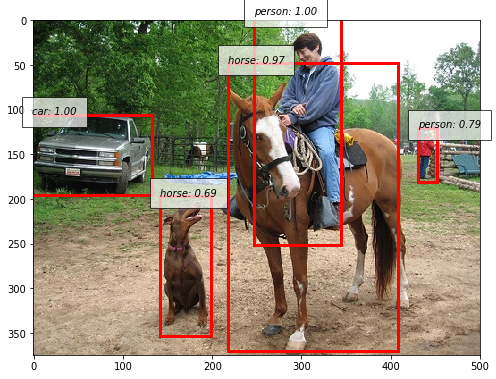

In [0]:
img = read_image(image)
model = SSD300(pretrained_model='voc0712')
bboxes, labels, scores = model.predict([img])

fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1, 1, 1)
vis_bbox(img, bboxes[0], labels[0], scores[0], label_names=voc_bbox_label_names, ax=ax1)
plt.show()

# vis_bbox() visualize below data
* bboxes
* labels
* scores

In [0]:
bboxes

[array([[105.490906 ,  -1.5966202, 195.76318  , 132.62552  ],
        [ 48.049473 , 217.36864  , 370.1765   , 407.98007  ],
        [197.04712  , 142.03159  , 352.88928  , 198.72156  ],
        [ -6.5204363, 246.63602  , 251.34483  , 344.8024   ],
        [120.25657  , 430.37958  , 180.91028  , 452.31668  ]],
       dtype=float32)]

In [0]:
labels

[array([ 6, 12, 12, 14, 14], dtype=int32)]

In [0]:
scores

[array([0.9999809 , 0.97067654, 0.68978584, 0.99868625, 0.79494715],
       dtype=float32)]

# low confidence socre
* SSD remove bounding boxes with low confidence scores
* model.score_thresh 0.6
* If SSD runs with a very low score_thresh, bounding boxes with low scores are kept

In [0]:
model.score_thresh

0.6

* change value of score_thresh

/usr/local/lib/python3.6/dist-packages/chainercv/utils/link.py:72: RuntimeWarning: Although the pretrained model is trained using cv2 as the backend of resize function, the current setting does not use cv2 as the backend of resize function. The performance may change due to using different backends. To suppress this warning, set `chainer.config.cv_resize_backend = "cv2".
  RuntimeWarning)


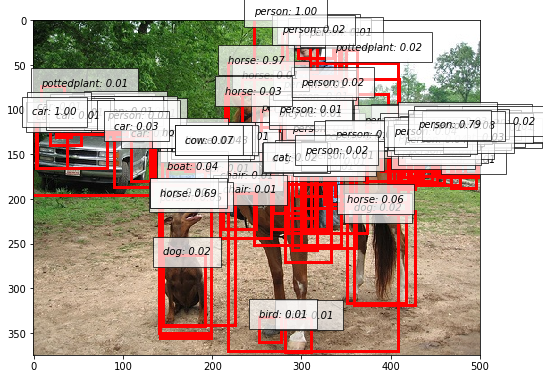

In [0]:
img = read_image(image)
model = SSD300(pretrained_model='voc0712')
model.score_thresh = 0.008
bboxes, labels, scores = model.predict([img])

fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1, 1, 1)
vis_bbox(img, bboxes[0], labels[0], scores[0], label_names=voc_bbox_label_names, ax=ax1)
plt.show()

In [0]:
model.score_thresh

0.05

# Try your data

In [0]:
image = 'sample2.jpg'

(3, 3024, 4032)

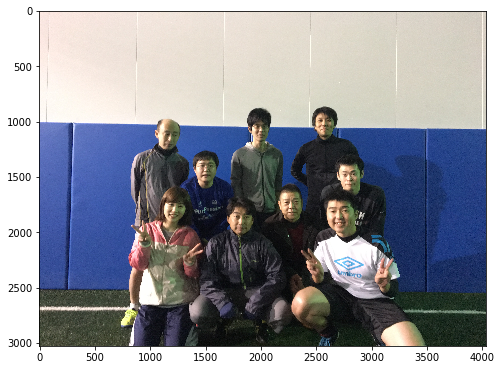

In [0]:
img = read_image(image)
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(1, 1, 1)
vis_image(img, ax)

img.shape

# Big size data is slow ==> Downscale

In [0]:
from chainercv.transforms import scale
img=scale(img, 300)

img.shape

(3, 300, 400)

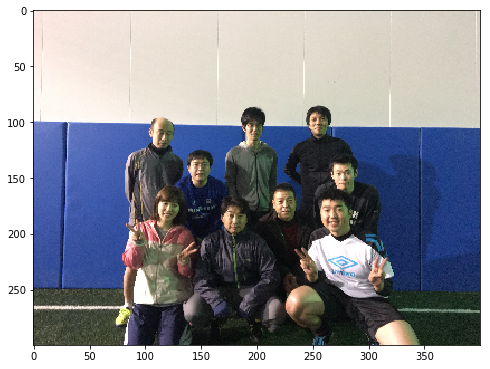

In [0]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(1, 1, 1)
vis_image(img, ax)
plt.show()

/usr/local/lib/python3.6/dist-packages/chainercv/utils/link.py:72: RuntimeWarning: Although the pretrained model is trained using cv2 as the backend of resize function, the current setting does not use cv2 as the backend of resize function. The performance may change due to using different backends. To suppress this warning, set `chainer.config.cv_resize_backend = "cv2".
  RuntimeWarning)


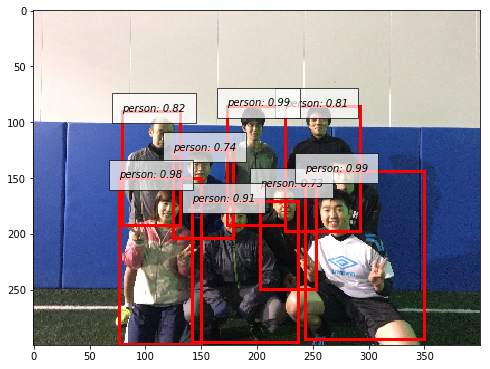

In [0]:
model = SSD300(pretrained_model='voc0712')
model.score_thresh = 0.6
bboxes, labels, scores = model.predict([img])

fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1, 1, 1)
vis_bbox(img, bboxes[0], labels[0], scores[0], label_names=voc_bbox_label_names, ax=ax1)
plt.show()

# Semantic Segmentation

In [0]:
from chainercv.visualizations import vis_semantic_segmentation

## Model: PSPNetResNet101
## Pretrained_model: CITYSPACE
* label_names (road, sidewalk, building,....) 
* The number 19

In [0]:
from chainercv.experimental.links import PSPNetResNet101
from chainercv.datasets import cityscapes_semantic_segmentation_label_names
from chainercv.datasets import cityscapes_semantic_segmentation_label_colors

pretrained_model = "cityscapes"
label_names = cityscapes_semantic_segmentation_label_names
colors = cityscapes_semantic_segmentation_label_colors

n_class = len(label_names)

model = PSPNetResNet101(n_class=n_class, pretrained_model=pretrained_model)
chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

labels = model.predict([img])
label = labels[0]

In [0]:
#check label names
print(label_names)
print(len(label_names))

('road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'trafficlight', 'trafficsign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle')
19


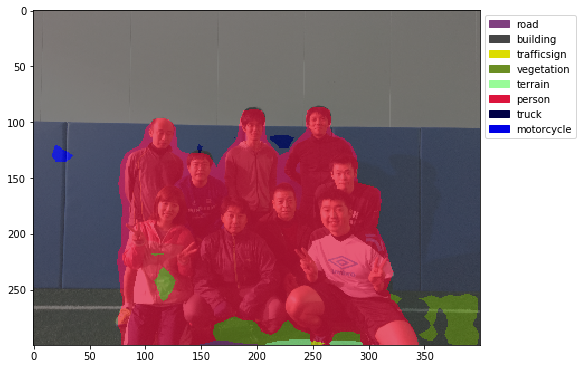

In [0]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1, 1, 1)
ax, legend_handles = vis_semantic_segmentation(img, label, label_names, colors, alpha=0.7, all_label_names_in_legend=True, ax=ax1)

#legend
ax.legend(handles=legend_handles, bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [0]:
print(np.unique(label))
print(label_names[11])

[ 0  2  7  8  9 11 14 17]
person


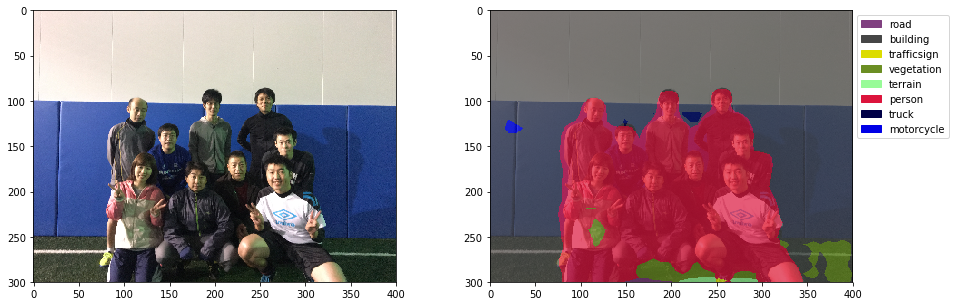

In [0]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
vis_image(img, ax=ax1)
ax2 = fig.add_subplot(1, 2, 2)
# Do not overlay the label image on the color image
ax, legend_handles = vis_semantic_segmentation(img, label, label_names, colors, alpha=0.7, all_label_names_in_legend=True, ax=ax2)

ax.legend(handles=legend_handles, bbox_to_anchor=(1, 1), loc=2)
plt.show()

## Model: PSPNetResNet101
## Pretrained_model: ADE20K
* label_names (wall, edifice, sky, flooring,....) 
* The number 150



In [0]:
from chainercv.experimental.links import PSPNetResNet101
from chainercv.datasets import ade20k_semantic_segmentation_label_names
from chainercv.datasets import ade20k_semantic_segmentation_label_colors

pretrained_model = "ade20k"
label_names = ade20k_semantic_segmentation_label_names
colors = ade20k_semantic_segmentation_label_colors

n_class = len(label_names)

model = PSPNetResNet101(n_class=n_class, pretrained_model=pretrained_model)

chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

labels = model.predict([img])
label = labels[0]

In [0]:
#check label names
print(label_names)
print(len(label_names))

('wall', 'edifice', 'sky', 'flooring', 'tree', 'ceiling', 'route', 'bed ', 'window ', 'grass', 'cabinet', 'pavement', 'soul', 'ground', 'door', 'table', 'mount', 'life', 'pall', 'chair', 'motorcar', 'water', 'picture', 'lounge', 'shelf', 'house', 'sea', 'mirror', 'carpeting', 'field', 'armchair', 'seat', 'fencing', 'desk', 'stone', 'press', 'lamp', 'tub', 'rail', 'cushion', 'stand', 'box', 'pillar', 'sign', 'dresser', 'counter', 'sand', 'sink', 'skyscraper', 'fireplace', 'icebox', 'stand', 'path', 'steps', 'runway', 'vitrine', 'table', 'pillow', 'screen', 'staircase', 'river', 'span', 'bookcase', 'screen', 'table', 'throne', 'flower', 'book', 'hill', 'bench', 'countertop', 'stove', 'tree', 'island', 'system', 'chair', 'boat', 'bar', 'machine', 'shanty', 'vehicle', 'towel', 'source', 'motortruck', 'tower', 'pendent', 'sunblind', 'lamp', 'kiosk', 'box', 'plane', 'track', 'clothes', 'pole', 'soil', 'handrail', 'stairway', 'hassock', 'bottle', 'sideboard', 'card', 'stage', 'van', 'ship', '

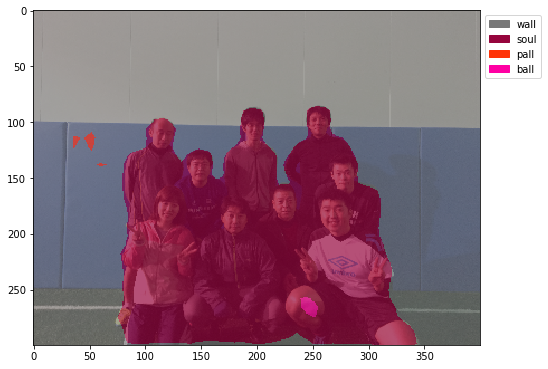

In [0]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1, 1, 1)
ax, legend_handles = vis_semantic_segmentation(img, label, label_names, colors, alpha=0.7, all_label_names_in_legend=True, ax=ax1)

#legend
ax.legend(handles=legend_handles, bbox_to_anchor=(1, 1), loc=2)
plt.show()

# Instance Segmentation


In [0]:
from chainercv.utils import mask_to_bbox
from chainercv.visualizations.colormap import voc_colormap
from chainercv.visualizations import vis_instance_segmentation

## Model: FCISResNet101
## Pretrained_model: SDB
* label_names (aeroplane, bicycle, bird, boat,....) 
* The number 20



In [0]:
from chainercv.experimental.links import FCISResNet101
from chainercv.datasets import sbd_instance_segmentation_label_names

pretrained_model = "sbd"
label_names = sbd_instance_segmentation_label_names

model = FCISResNet101(n_fg_class=len(label_names), pretrained_model=pretrained_model)
chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

masks, labels, scores = model.predict([img])
mask, label, score = masks[0], labels[0], scores[0]
bbox = mask_to_bbox(mask)
colors = voc_colormap(list(range(1, len(mask) + 1)))

/usr/local/lib/python3.6/dist-packages/chainercv/utils/link.py:72: RuntimeWarning: Although the pretrained model is trained using cv2 as the backend of resize function, the current setting does not use cv2 as the backend of resize function. The performance may change due to using different backends. To suppress this warning, set `chainer.config.cv_resize_backend = "cv2".
  RuntimeWarning)


In [0]:
#check label names
print(label_names)
print(len(label_names))

('aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor')
20


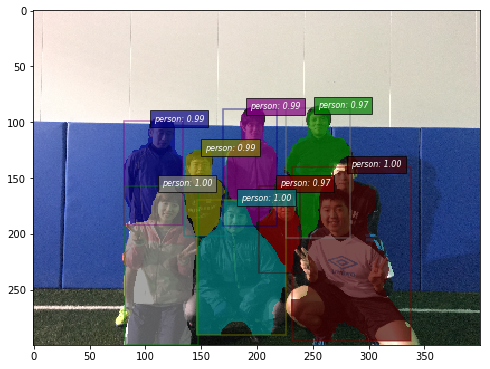

In [0]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1, 1, 1)
ax = vis_bbox(img, bbox, instance_colors=colors, alpha=0.5, linewidth=1.5, ax=ax1)
vis_instance_segmentation(img, mask, label, score, label_names=label_names,instance_colors=colors, alpha=0.7, ax=ax)

plt.show()

## Model: FCISResNet101
## Pretrained_modell: COCO
* label_names (person, bicycle, car, motorcycle,....) 
* The number 80

In [0]:
from chainercv.experimental.links import FCISResNet101
from chainercv.datasets import coco_instance_segmentation_label_names

pretrained_model = "coco"
label_names = coco_instance_segmentation_label_names

model = FCISResNet101(n_fg_class=len(label_names), anchor_scales=(4, 8, 16, 32), pretrained_model=pretrained_model, proposal_creator_params = FCISResNet101.proposal_creator_params)
chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

masks, labels, scores = model.predict([img])
mask, label, score = masks[0], labels[0], scores[0]
bbox = mask_to_bbox(mask)
colors = voc_colormap(list(range(1, len(mask) + 1)))

/usr/local/lib/python3.6/dist-packages/chainercv/utils/link.py:72: RuntimeWarning: Although the pretrained model is trained using cv2 as the backend of resize function, the current setting does not use cv2 as the backend of resize function. The performance may change due to using different backends. To suppress this warning, set `chainer.config.cv_resize_backend = "cv2".
  RuntimeWarning)


In [0]:
#check label names
print(label_names)
print(len(label_names))

('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')
80


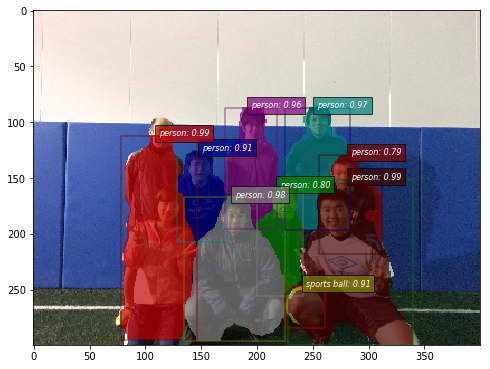

In [0]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1, 1, 1)
ax = vis_bbox(img, bbox, instance_colors=colors, alpha=0.5, linewidth=1.5, ax=ax1)
vis_instance_segmentation(None, mask, label, score, label_names=label_names,instance_colors=colors, alpha=0.7, ax=ax)

plt.show()